In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [ ]:
#download the seaborn library:

In [8]:
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
import seaborn as sns

In [10]:
#to ignore warnings
import warnings

In [11]:
warnings.filterwarnings('ignore')

In [ ]:
#read and clean data start here

In [12]:
data = pd.read_csv("murders.csv")

In [13]:
data.head()

,Year,State,Total,Type,By Weapon
0,1991,National,21676,Firearms,14373
1,1991,National,21676,Cutting,3430
2,1991,National,21676,Unarmed,1202
3,1991,National,21676,Other,2671
4,1992,National,22716,Firearms,15489


In [14]:
data.tail()

,Year,State,Total,Type,By Weapon
2643,2016,Wisconsin,226,Unarmed,12
2644,2016,Wyoming,19,Firearms,6
2645,2016,Wyoming,19,Cutting,8
2646,2016,Wyoming,19,Other,3
2647,2016,Wyoming,19,Unarmed,2


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       2648 non-null   int64 
 1   State      2648 non-null   object
 2   Total      2648 non-null   int64 
 3   Type       2648 non-null   object
 4   By Weapon  2648 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 82.8+ KB


In [16]:
data.nunique()

Year          26
State         54
Total        388
Type           4
By Weapon    410
dtype: int64

In [17]:
data.isnull().sum()

Year         0
State        0
Total        0
Type         0
By Weapon    0
dtype: int64

In [18]:
(data.isnull().sum()/(len(data)))*100

Year         0.0
State        0.0
Total        0.0
Type         0.0
By Weapon    0.0
dtype: float64

In [ ]:
data = data.drop(['year'], axis = 1)
data.info()

In [22]:
print(data.State.unique())

['National' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'
 'District of Columbia' 'Virgin Islands' 'Guam' 'U.S. Virgin Islands']


In [23]:
#EDA start from here
#EDA: Exploratory Data Analysis (EDA) with Python involves analyzing and summarizing data to gain insights and understand its underlying patterns, 
#relationships, and distributions using Python programming language.
#first applay some math and statictical then EDA

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,2648.0,607.803625,2448.443437,2.0,41.0,161.0,407.0,23180.0
By Weapon,2648.0,151.950906,875.956318,0.0,7.0,21.5,62.0,16136.0


In [25]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,2648,54,National,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,2648.0,NaN,NaN,NaN,607.803625,2448.443437,2.0,41.0,161.0,407.0,23180.0
Type,2648,4,Firearms,662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
By Weapon,2648.0,NaN,NaN,NaN,151.950906,875.956318,0.0,7.0,21.5,62.0,16136.0


In [26]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['State', 'Type'], dtype='object')
Numerical Variables:
['Total', 'By Weapon']


In [28]:
#Analyzing/visualizing
#Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.
#Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy
#Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.
#Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Total
Skew : 7.26


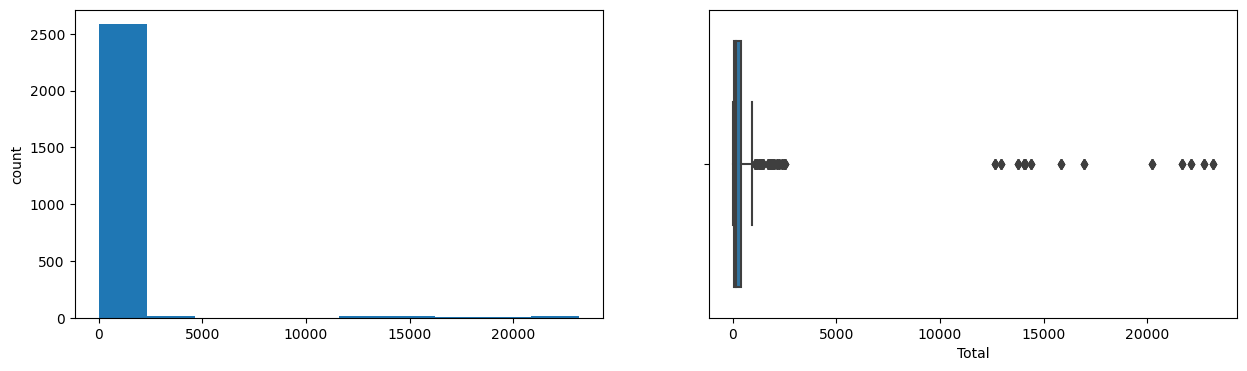

By Weapon
Skew : 13.37


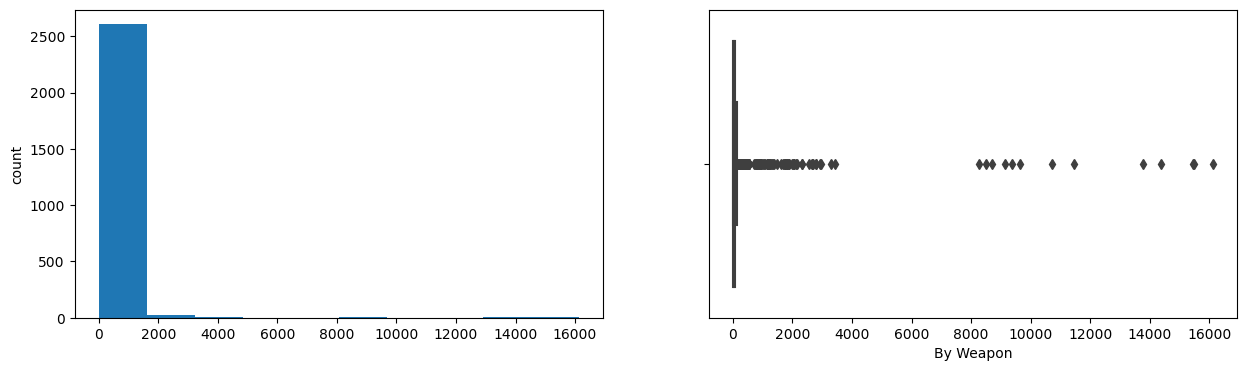

In [29]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

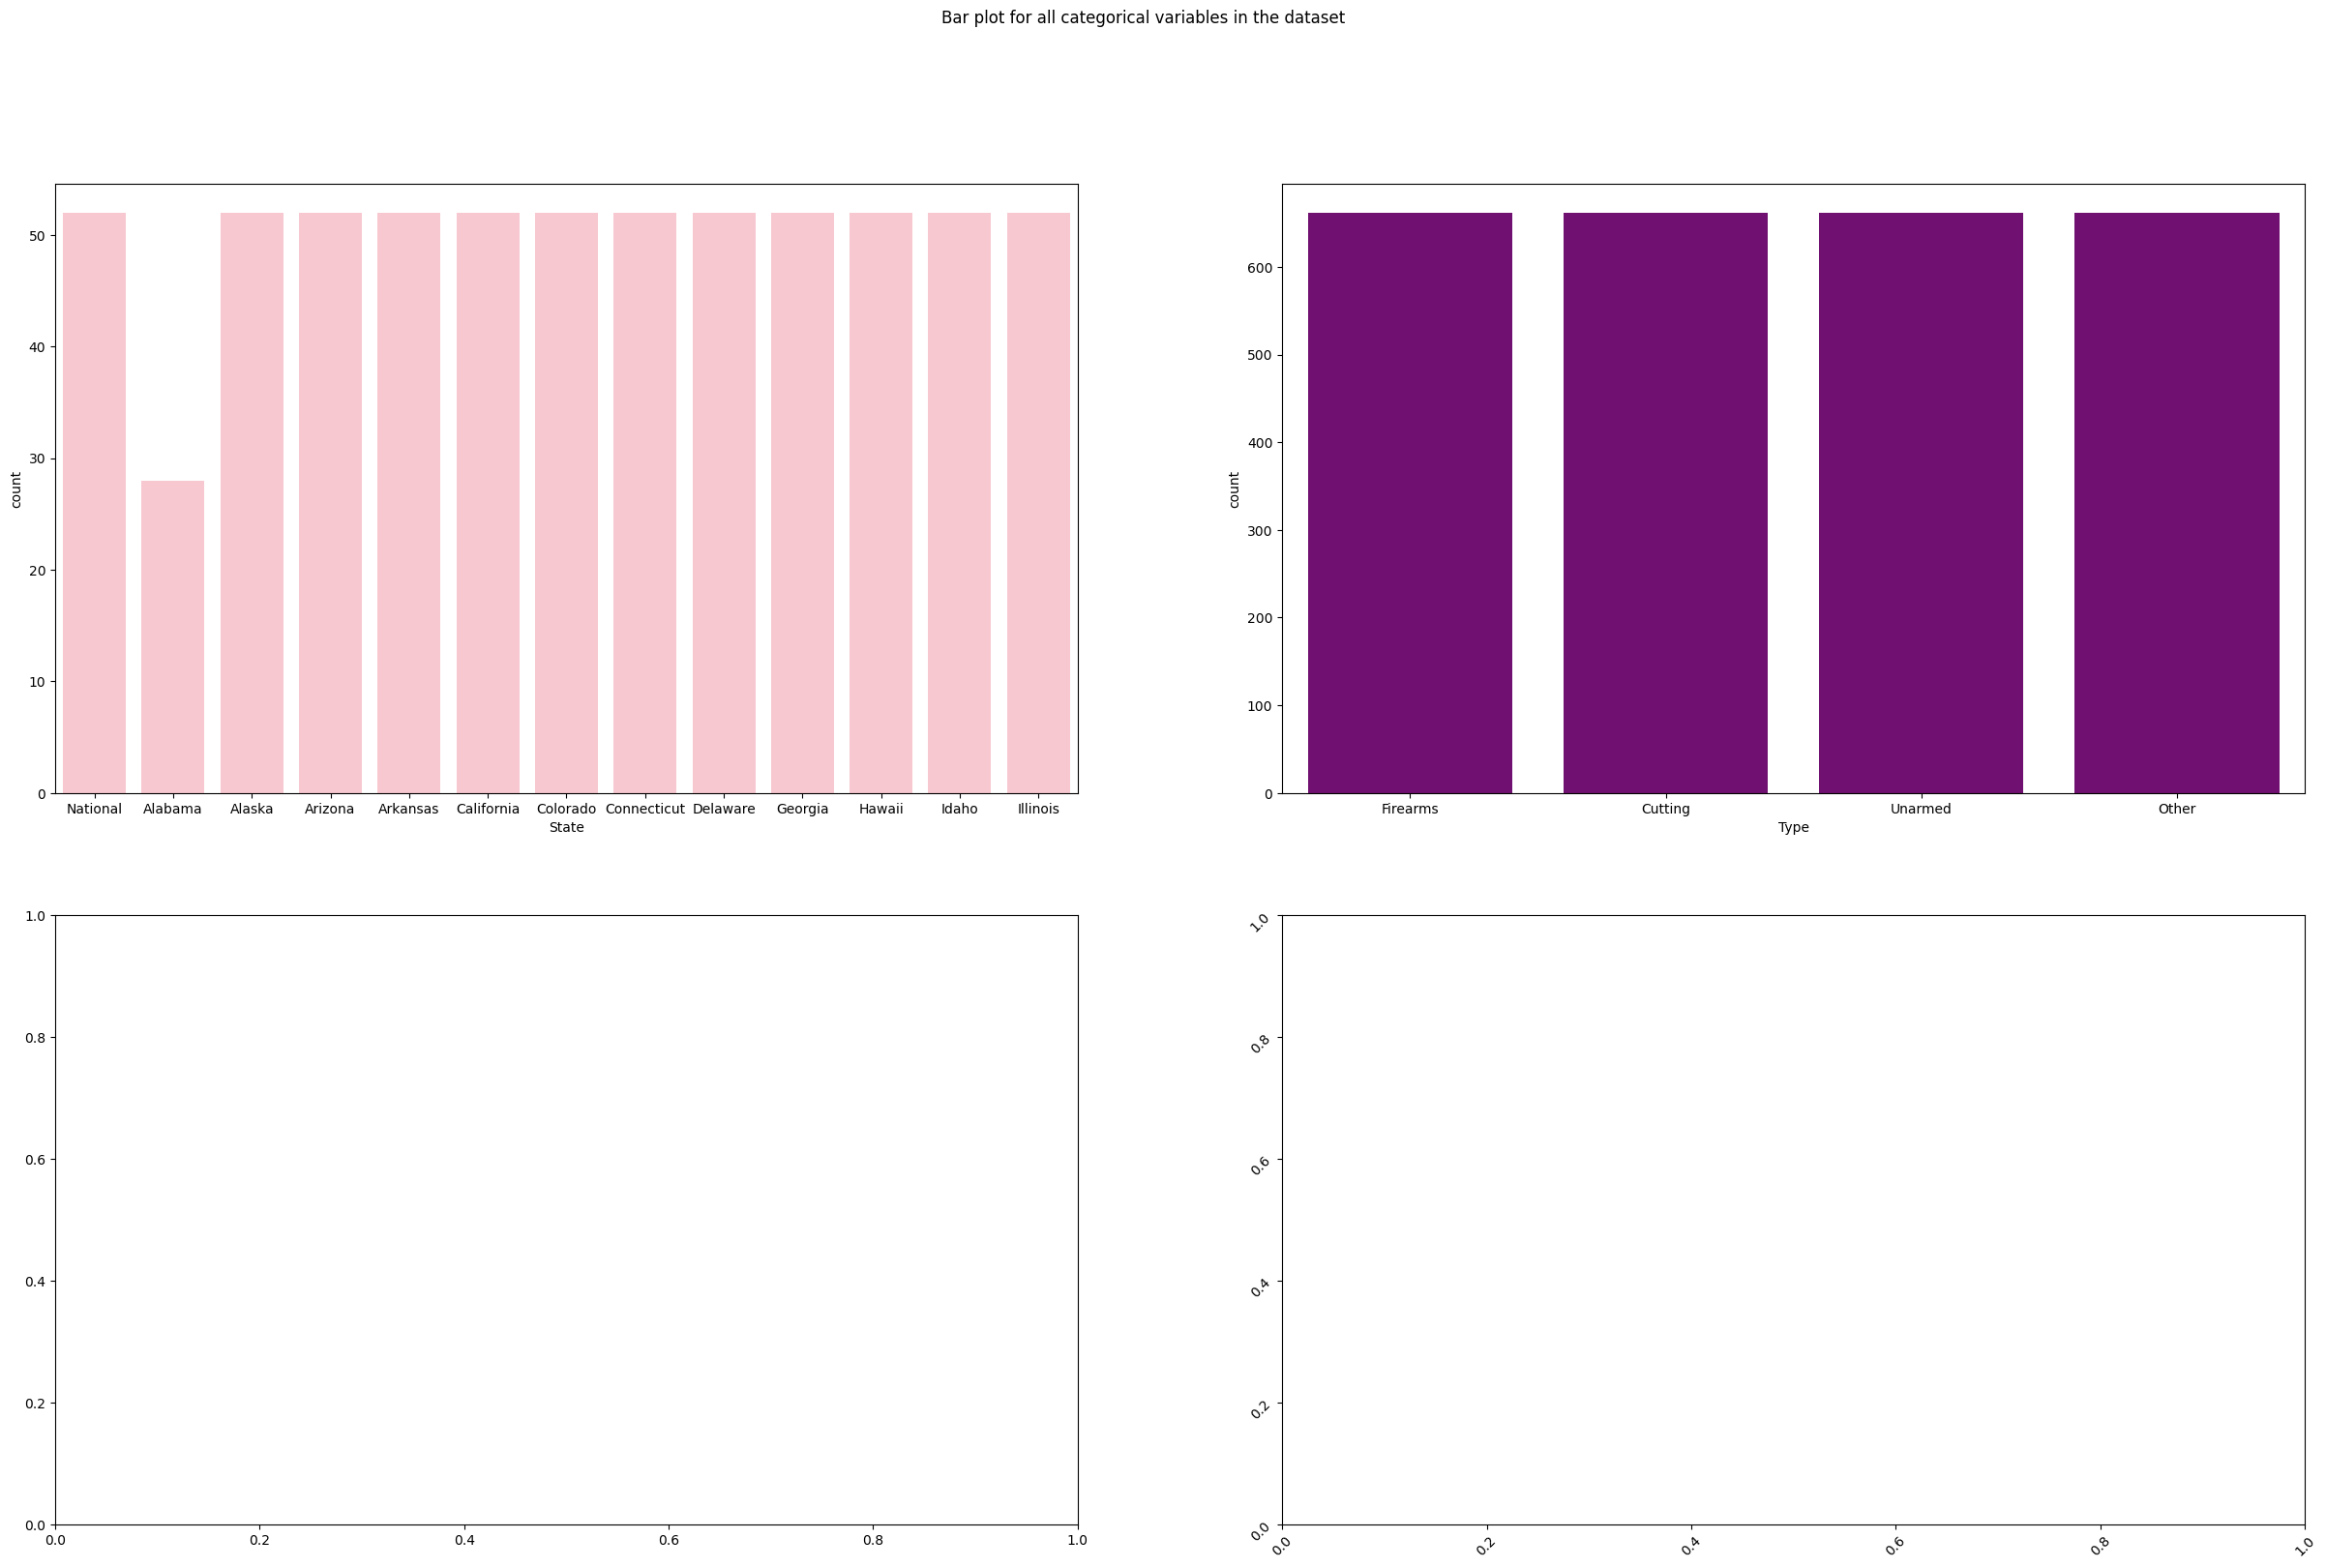

In [85]:
fig, axes = plt.subplots(2, 2, figsize = (30, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'State', data = data, color = 'pink', 
              order = data['State'].head(100).value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Type', data = data, color = 'purple', 
              order = data['Type'].value_counts().index);
axes[1][1].tick_params(labelrotation=45);

In [51]:
#Data Transformation

In [52]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [53]:
log_transform(data,['Total','By Weapon'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          2648 non-null   object 
 1   Total          2648 non-null   int64  
 2   Type           2648 non-null   object 
 3   By Weapon      2648 non-null   int64  
 4   Total_log      2648 non-null   float64
 5   By Weapon_log  2648 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 103.5+ KB


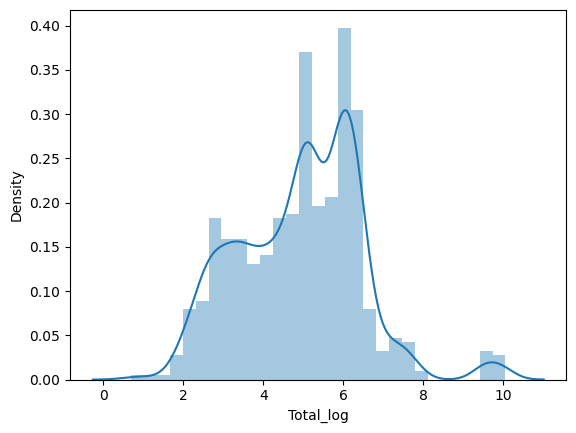

In [57]:
#Log transformation of the feature 'Total'
sns.distplot(data["Total_log"], axlabel="Total_log");


<Figure size 1300x1700 with 0 Axes>

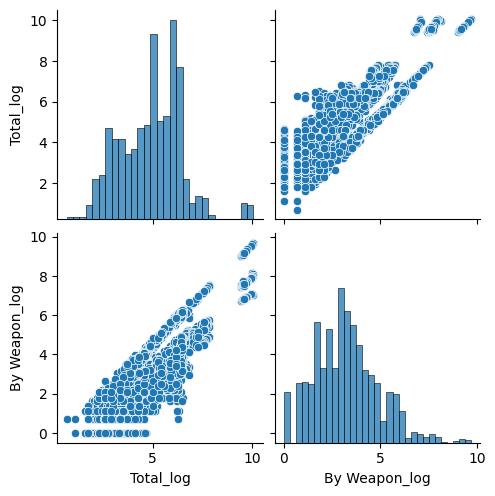

In [60]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Total','By Weapon'],axis=1))
plt.show()

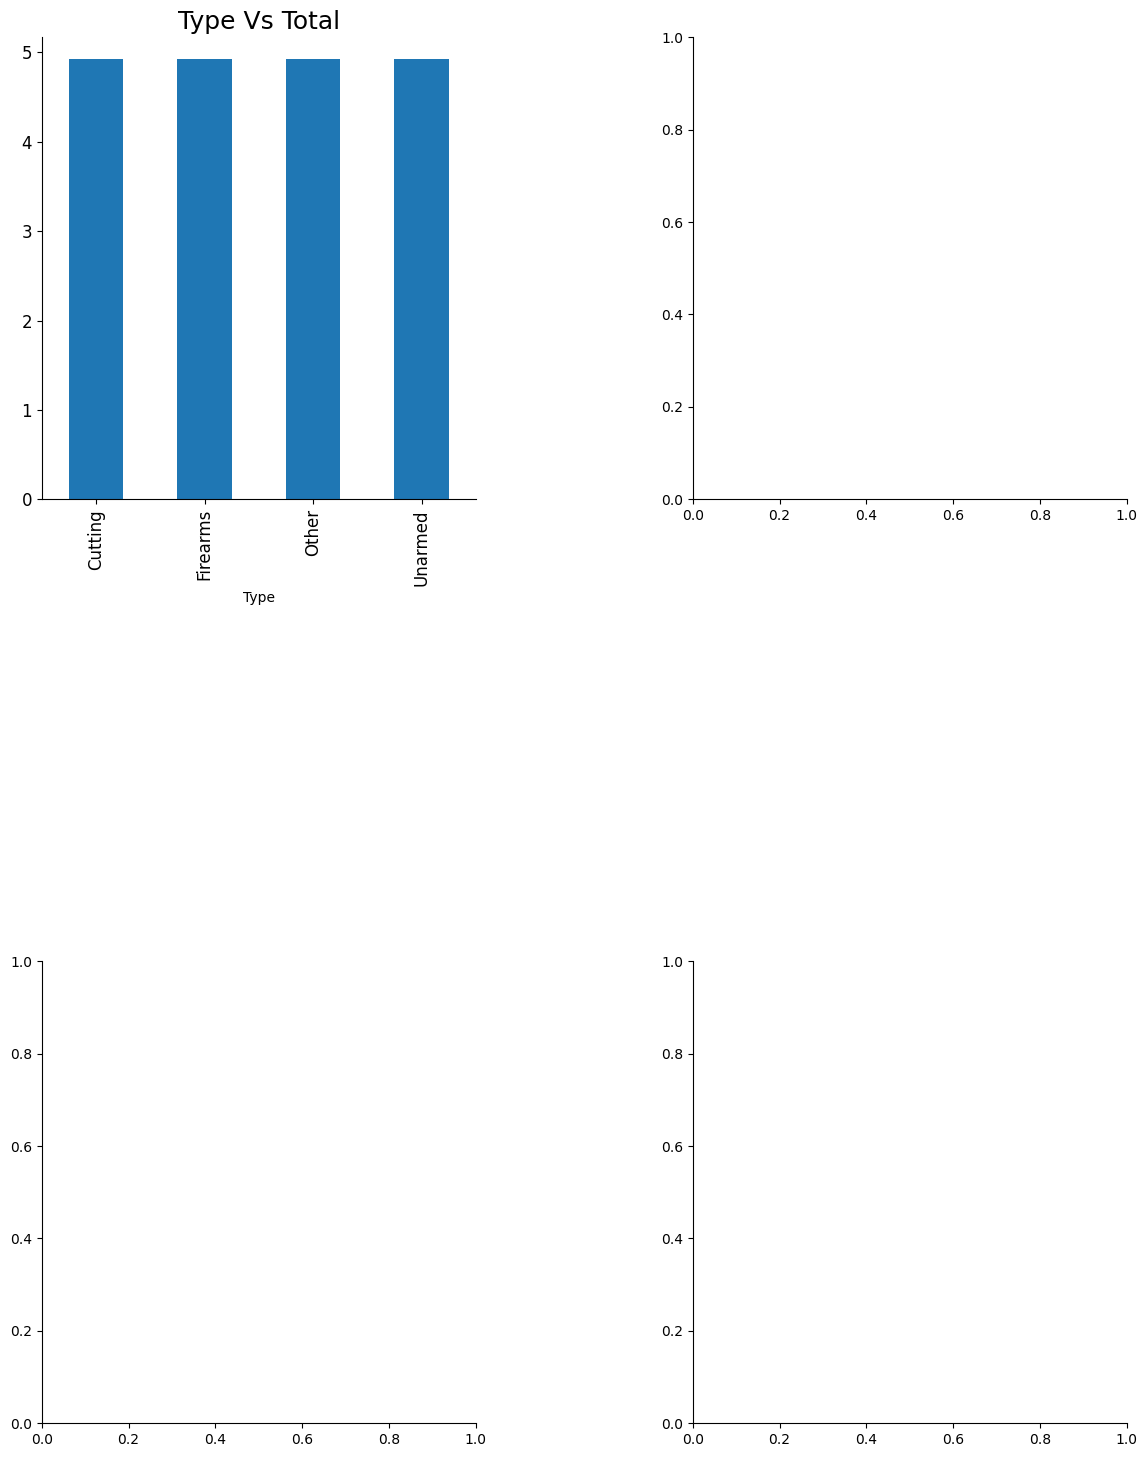

In [87]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 18))
data.groupby('Type')['Total_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Type Vs Total", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          2648 non-null   object 
 1   Total          2648 non-null   int64  
 2   Type           2648 non-null   object 
 3   By Weapon      2648 non-null   int64  
 4   Total_log      2648 non-null   float64
 5   By Weapon_log  2648 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 103.5+ KB


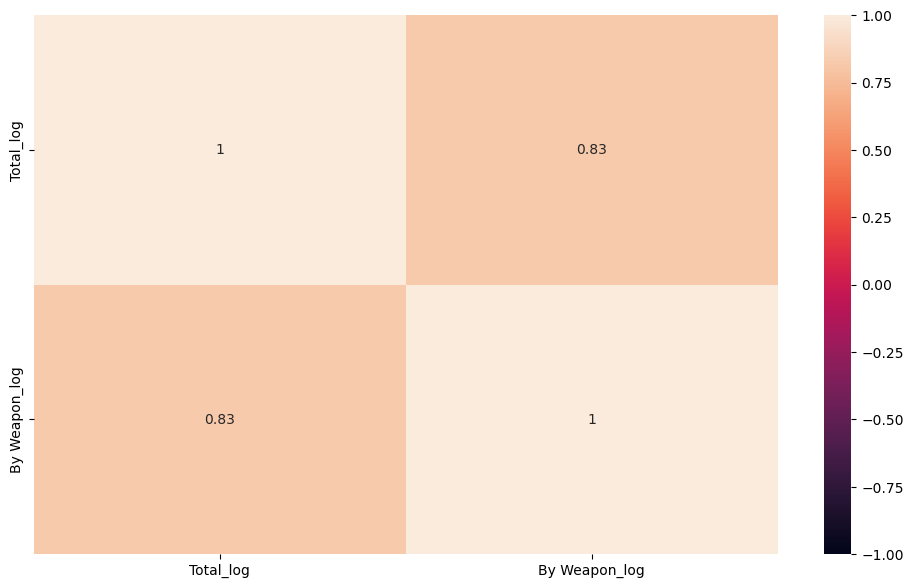

In [98]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Total','By Weapon'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [95]:
#Impute Missing values

In [97]:
data.loc[data["State"]==0.0,'State']=np.nan
data.State.isnull().sum()

0

In [100]:
data.loc[data["Type"]==0.0,'Type']=np.nan
data.Type.isnull().sum()

0